In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from utils.preprocessor import *
from utils.utilities import ensure_dir
import plotly.graph_objects as go
from scipy import stats

In [2]:
image = cv2.imread("data/2135041001/front.jpg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

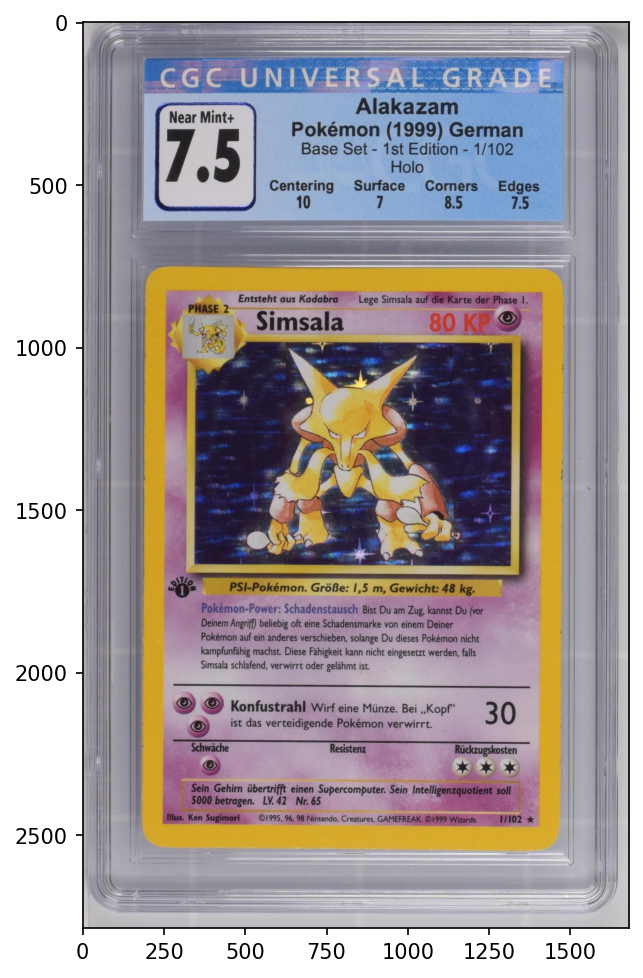

In [3]:
plt.figure(figsize=(10, 8), dpi=150)
plt.imshow(rgb_image)

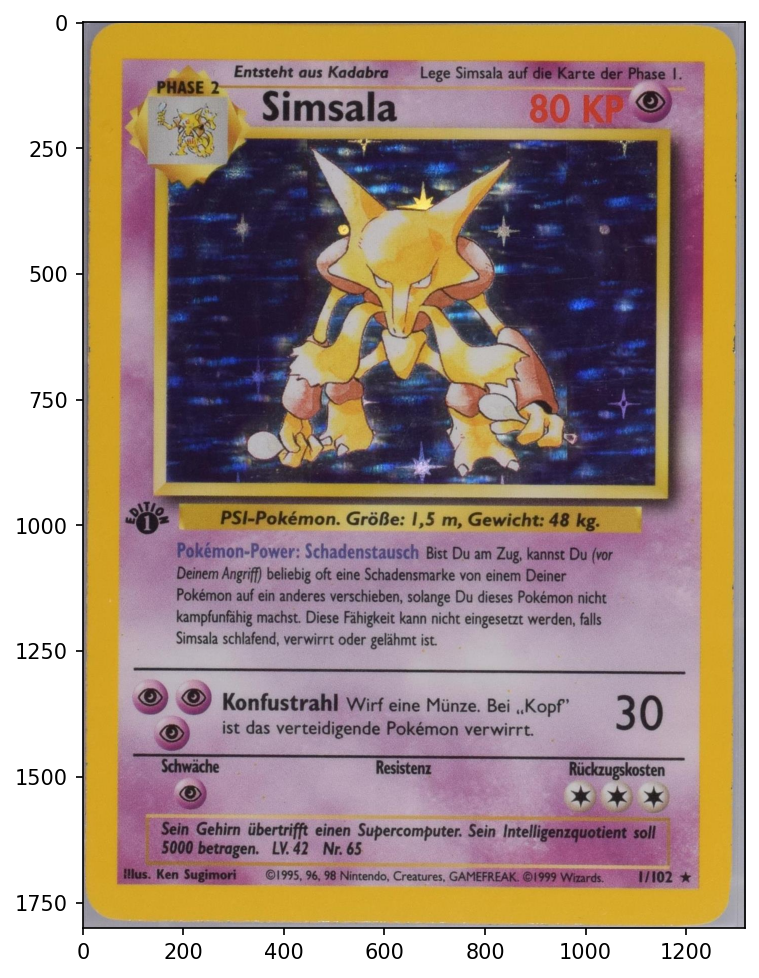

In [4]:
contour_image = extract_contour_for_dim_image(rgb_image)
plt.figure(figsize=(10, 8), dpi=150)
plt.imshow(contour_image)

In [5]:
# find edges
edge_image = cv2.Canny(contour_image, 50, 150)
plt.figure(figsize=(10, 8), dpi=150)
plt.imshow(edge_image, cmap = 'gray')

In [15]:
# Remove large contour
# get contours
contours, _ = cv2.findContours(edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# image size
height, width = edge_image.shape
image_area = height * width

# sort contour index
index_sort = sorted(range(len(contours)), key=lambda i : cv2.contourArea(contours[i]),reverse=True)
contours_sort = [contours[i] for i in index_sort]

# get area and perimeter
contour_peri = [cv2.arcLength(contours_sort[i], True) for i in range(len(index_sort))]
approx = [cv2.approxPolyDP(contours_sort[i], 0.001 * contour_peri[i], True) for i in range(len(index_sort))]
bounding_box = [cv2.boundingRect(approx[i]) for i in range(len(index_sort))]
contour_area = np.array(sorted([bounding_box[i][2] * bounding_box[i][3]  for i in range(len(index_sort))]))
max_thresh = contour_area[np.where(stats.zscore(contour_area) > 3)].min()